In [1]:
!pip install 'umap-learn==0.3.10'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 769.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.3.10-py3-none-any.whl size=38881 sha256=a655f69f52d640d31b9907256a97b8b24f976143620b41e0ab75546fe1608a85
  Stored in directory: /root/.cache/pip/wheels/9f/16/eb/f9c0c62396d1c1bdce61feb50c4e70adbf925f8b6e0a45bd60
Successfully built umap-learn


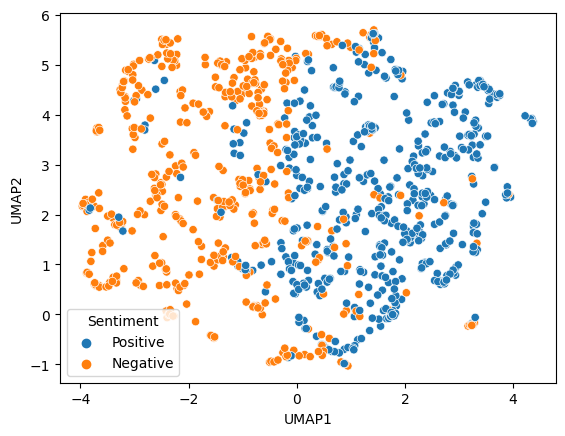

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from umap import UMAP

# Load the reviews.csv file into a Pandas DataFrame
reviews_df = pd.read_csv('reviews.csv')

# Create a TfidfVectorizer object to convert the reviews into a TF-IDF matrix
vectorizer = TfidfVectorizer()

# Use the vectorizer to convert the reviews into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(reviews_df['Review'])

# Use UMAP to reduce the dimensionality of the TF-IDF matrix to two dimensions
umap = UMAP(n_components=2)
umap_matrix = umap.fit_transform(tfidf_matrix.toarray())
  
# Add the UMAP coordinates to the DataFrame
reviews_df['UMAP1'] = umap_matrix[:, 0]
reviews_df['UMAP2'] = umap_matrix[:, 1]

# Visualize the TF-IDF matrix using UMAP
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Sentiment', data=reviews_df)
plt.show()


# How does tuning TF-IDF hyperparameters ‘ngram_range’ and ‘min_df’ affect the TF-IDF matrix and the subsequent visualization?


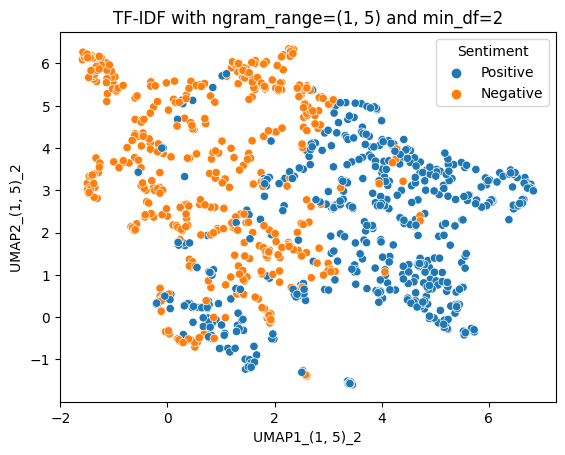

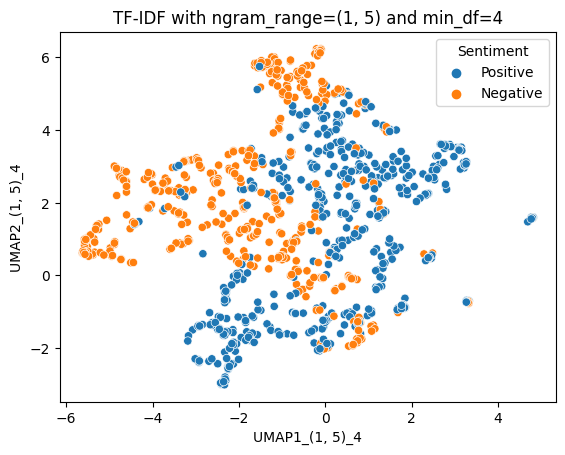

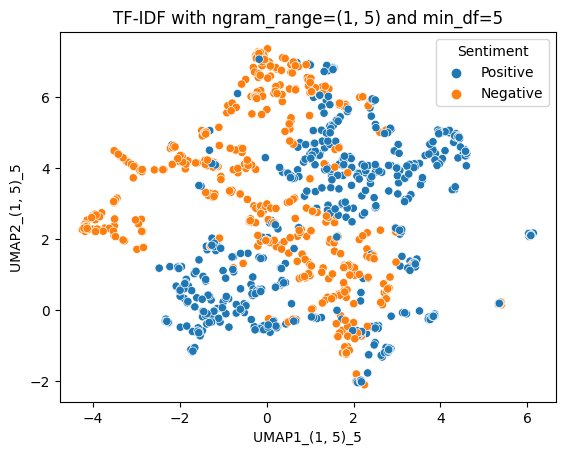

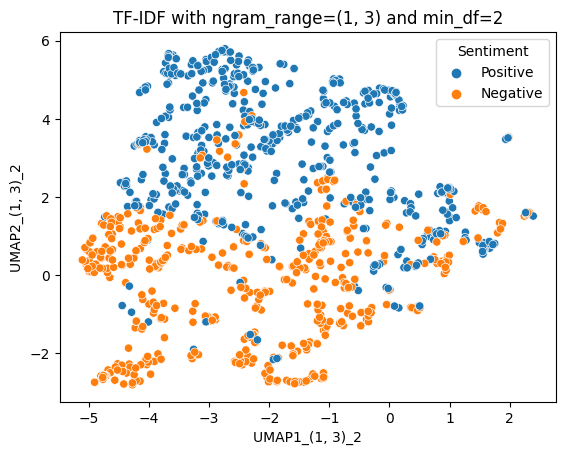

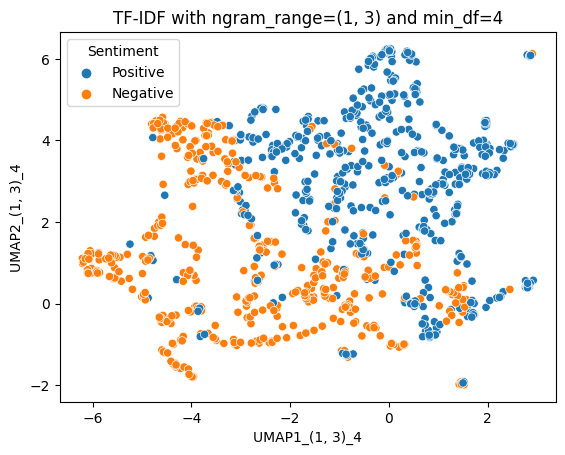

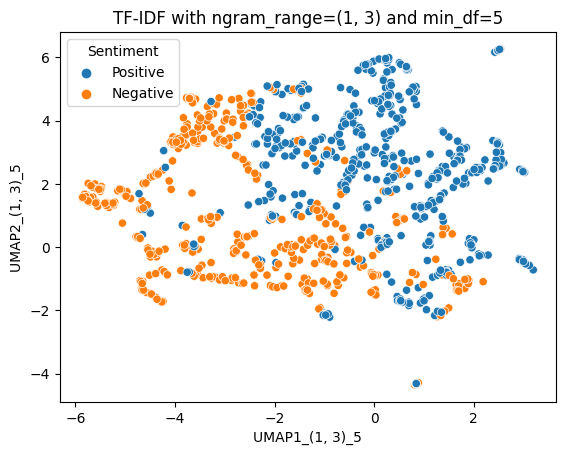

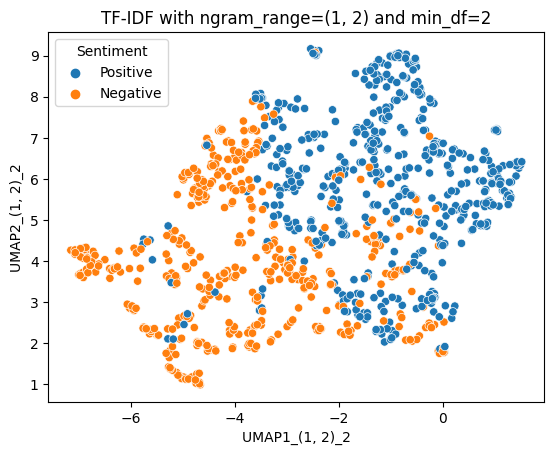

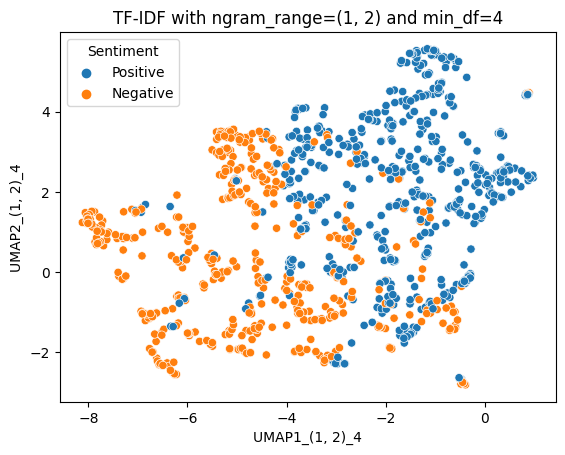

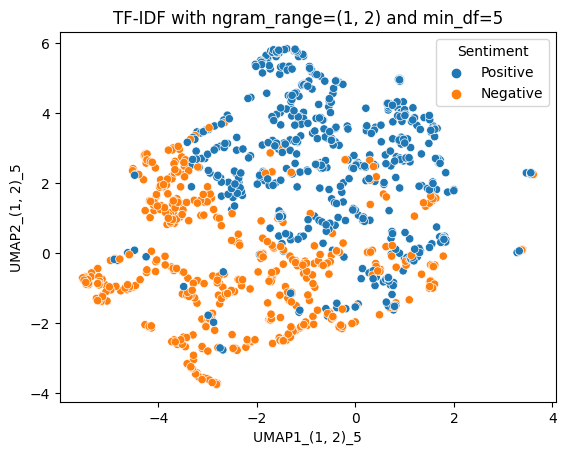

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

# Load the reviews.csv file into a Pandas DataFrame
reviews_df = pd.read_csv('reviews.csv')

# Define the range of n-grams to use
ngram_ranges = [(1, 5), (1, 3), (1, 2)]

# Define the minimum document frequency for terms to be included
min_dfs = [2, 4, 5]

# Loop over the different hyperparameter settings and visualize the resulting TF-IDF matrices
for ngram_range in ngram_ranges:
    for min_df in min_dfs:
        # Create a TfidfVectorizer object with the specified hyperparameters
        vectorizer = TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)

        # Use the vectorizer to convert the reviews into a TF-IDF matrix
        tfidf_matrix = vectorizer.fit_transform(reviews_df['Review'])

        # Use UMAP to reduce the dimensionality of the TF-IDF matrix to two dimensions
        umap = UMAP(n_components=2)
        umap_matrix = umap.fit_transform(tfidf_matrix.toarray())

        # Add the UMAP coordinates to the DataFrame
        reviews_df[f'UMAP1_{ngram_range}_{min_df}'] = umap_matrix[:, 0]
        reviews_df[f'UMAP2_{ngram_range}_{min_df}'] = umap_matrix[:, 1]

        # Visualize the TF-IDF matrix using UMAP
        sns.scatterplot(x=f'UMAP1_{ngram_range}_{min_df}', y=f'UMAP2_{ngram_range}_{min_df}', hue='Sentiment', data=reviews_df)
        plt.title(f'TF-IDF with ngram_range={ngram_range} and min_df={min_df}')
        plt.show()


# How does tuning UMAP hyperparameters ‘n_neighbors’ and ‘min_dist’ affect the visualization? 

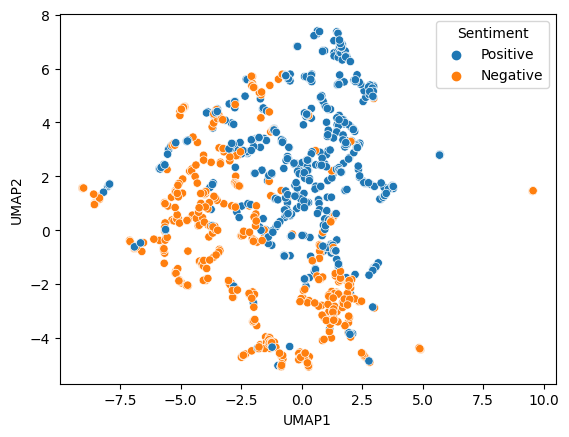

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from umap import UMAP

# Load the reviews.csv file into a Pandas DataFrame
reviews_df = pd.read_csv('reviews.csv')

# Create a TfidfVectorizer object to convert the reviews into a TF-IDF matrix
vectorizer = TfidfVectorizer()

# Use the vectorizer to convert the reviews into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(reviews_df['Review'])

# Use UMAP to reduce the dimensionality of the TF-IDF matrix to two dimensions
umap = UMAP(n_components=2, n_neighbors=5, min_dist=0.1)
umap_matrix = umap.fit_transform(tfidf_matrix.toarray())

# Add the UMAP coordinates to the DataFrame
reviews_df['UMAP1'] = umap_matrix[:, 0]
reviews_df['UMAP2'] = umap_matrix[:, 1]

# Visualize the TF-IDF matrix using UMAP
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Sentiment', data=reviews_df)
plt.show()


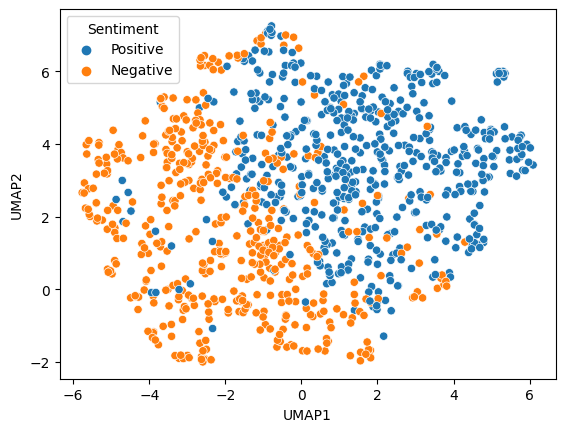

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from umap import UMAP

# Load the reviews.csv file into a Pandas DataFrame
reviews_df = pd.read_csv('reviews.csv')

# Create a TfidfVectorizer object to convert the reviews into a TF-IDF matrix
vectorizer = TfidfVectorizer()

# Use the vectorizer to convert the reviews into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(reviews_df['Review'])

# Use UMAP to reduce the dimensionality of the TF-IDF matrix to two dimensions
umap = UMAP(n_components=2, n_neighbors=10, min_dist=0.4)
umap_matrix = umap.fit_transform(tfidf_matrix.toarray())

# Add the UMAP coordinates to the DataFrame
reviews_df['UMAP1'] = umap_matrix[:, 0]
reviews_df['UMAP2'] = umap_matrix[:, 1]

# Visualize the TF-IDF matrix using UMAP
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Sentiment', data=reviews_df)
plt.show()

# Can you identify two clusters of reviews based on positive and negative sentiments? If yes, can you identify any sub-clusters within these two clusters? If yes, what do the sub-clusters tell us?

Yes, based on the visualization of the TF-IDF matrix using UMAP, we can identify 2 clusters of reviews based on positive (blue) and negative (orange) sentiments of the customers. 
The negative reviews (orange) are clustered to the left of scatterplot whereas positive reviews (blue) are to the right of the scatterplot.
No clear visible sub-clusters were identified from the generated scatterplot.